In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels

from scipy import stats
from statsmodels.stats import stattools
from statsmodels.stats.weightstats import DescrStatsW

In [2]:
mall_data = pd.read_csv('datasets/mall_data_processed.csv', index_col=0)

mall_data.head(5)

,gender,age,annual_income,spending_score,above_average_income
customer_id,,,,,
1,Male,19,15000,39,False
2,Male,21,15000,81,False
3,Female,20,16000,6,False
4,Female,23,16000,77,False
5,Female,31,17000,40,False


In [3]:
mall_data.shape

(200, 5)

In [4]:
mall_data.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000
std,13.969007,26264.721165,25.823522
min,18.000000,15000.000000,1.000000
25%,28.750000,41500.000000,34.750000
50%,36.000000,61500.000000,50.000000
75%,49.000000,78000.000000,73.000000
max,70.000000,137000.000000,99.000000


In [5]:
income_descr = DescrStatsW(mall_data['annual_income'])

age_descr = DescrStatsW(mall_data['age'])

In [6]:
q1_income = income_descr.quantile(0.25)

q3_income = income_descr.quantile(0.75)

In [7]:
q1_income

p
0.25    41000
dtype: int64

In [8]:
q3_income

p
0.75    78000
dtype: int64

In [9]:
type(q1_income)

pandas.core.series.Series

In [10]:
iqr_income = q3_income.loc[0.75] - q1_income.loc[0.25]

iqr_income

37000

In [11]:
stats.iqr(mall_data['annual_income'])

36500.0

In [12]:
stats.iqr(mall_data['annual_income'], interpolation='lower')

38000

In [13]:
stats.iqr(mall_data['annual_income'], interpolation='higher')

36000

In [14]:
stats.iqr(mall_data['annual_income'], interpolation='midpoint')

37000.0

In [15]:
q1_income_np = np.percentile(mall_data['annual_income'], 25)

q1_income_np

41500.0

In [16]:
q3_income_np = np.percentile(mall_data['annual_income'], 75)

q3_income_np

78000.0

/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='annual_income'>

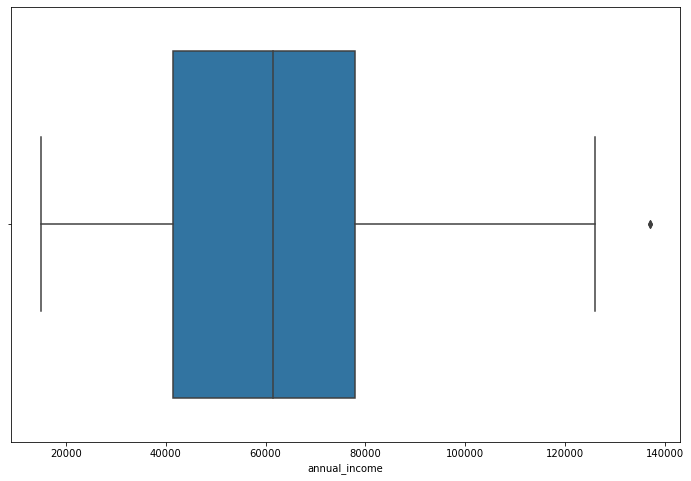

In [17]:
plt.figure(figsize=(12, 8))

sns.boxplot(mall_data['annual_income'], orient='v')

/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='spending_score'>

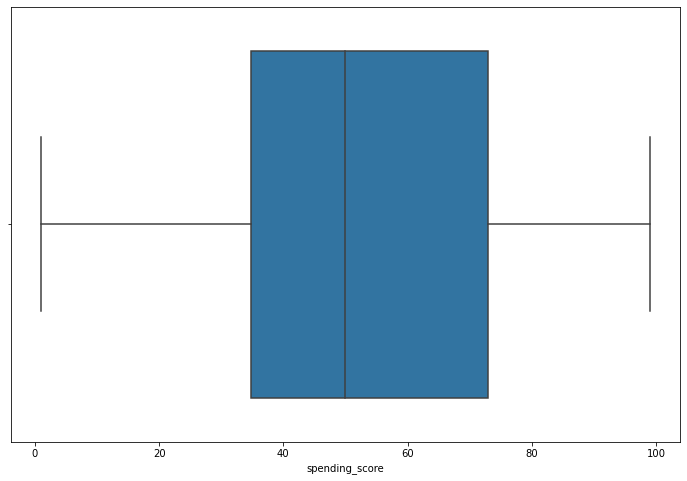

In [18]:
plt.figure(figsize=(12, 8))

sns.boxplot(mall_data['spending_score'], orient='v')

In [19]:
mall_data.head()

,gender,age,annual_income,spending_score,above_average_income
customer_id,,,,,
1,Male,19,15000,39,False
2,Male,21,15000,81,False
3,Female,20,16000,6,False
4,Female,23,16000,77,False
5,Female,31,17000,40,False


<AxesSubplot:xlabel='gender', ylabel='annual_income'>

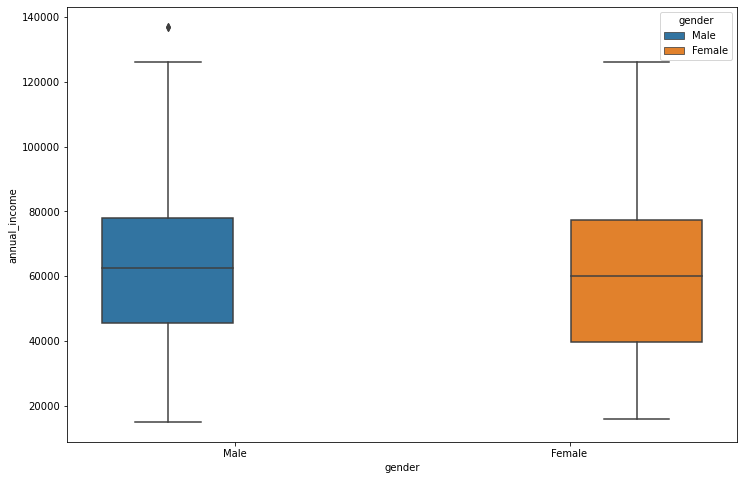

In [20]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='gender', y='annual_income', hue='gender', data=mall_data, orient='v')

<AxesSubplot:xlabel='gender', ylabel='spending_score'>

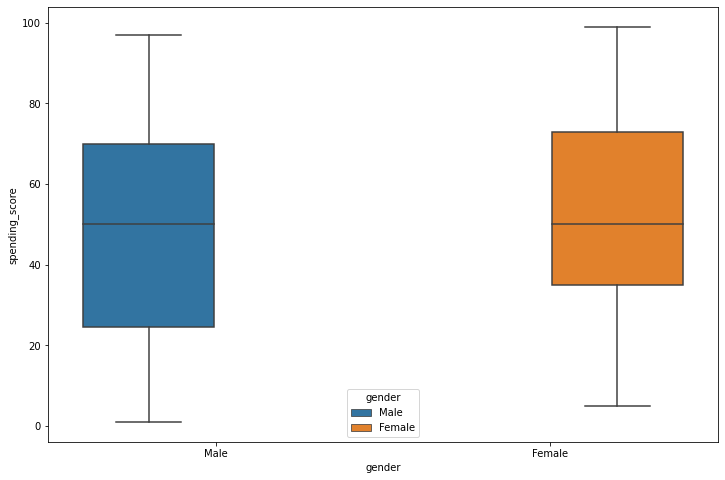

In [21]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='gender', y='spending_score', hue='gender', data=mall_data, orient='v')

<AxesSubplot:xlabel='above_average_income', ylabel='spending_score'>

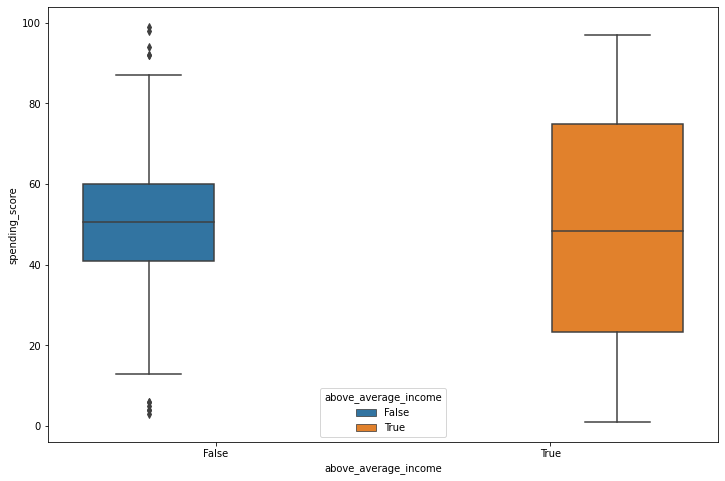

In [22]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='above_average_income', y='spending_score', hue='above_average_income', 
            data=mall_data, orient='v')

In [23]:
income_descr.var

686386400.0

In [24]:
age_descr.var

194.1575000000001

In [25]:
income_descr.std

26198.97707926781

In [26]:
age_descr.std

13.934041050606966

In [27]:
stats.describe(mall_data['annual_income'])

DescribeResult(nobs=200, minmax=(15000, 137000), mean=60560.0, variance=689835577.8894472, skewness=0.3194236842763142, kurtosis=-0.1258928297475106)

In [28]:
stats.describe(mall_data['age'])

DescribeResult(nobs=200, minmax=(18, 70), mean=38.85, variance=195.13316582914572, skewness=0.48191947090957177, kurtosis=-0.6847513947723236)

In [29]:
listOfSeries = [pd.Series(['Male', 20, 250000, 98, True], index=mall_data.columns ), 
                pd.Series(['Female', 18, 280000, 20, True], index=mall_data.columns ),
                pd.Series(['Male', 78, 20000, 22, True], index=mall_data.columns )
               ]

In [30]:
mall_updated = mall_data.append(listOfSeries , ignore_index=True)

mall_updated.tail()

,gender,age,annual_income,spending_score,above_average_income
198,Male,32,137000,18,True
199,Male,30,137000,83,True
200,Male,20,250000,98,True
201,Female,18,280000,20,True
202,Male,78,20000,22,True


In [31]:
np.ptp(mall_data['annual_income'])

122000

In [32]:
np.ptp(mall_updated['annual_income'])

265000

In [33]:
stats.iqr(mall_data['annual_income'], interpolation='midpoint')

37000.0

In [34]:
stats.iqr(mall_updated['annual_income'], interpolation='midpoint')

37000.0

/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='spending_score'>

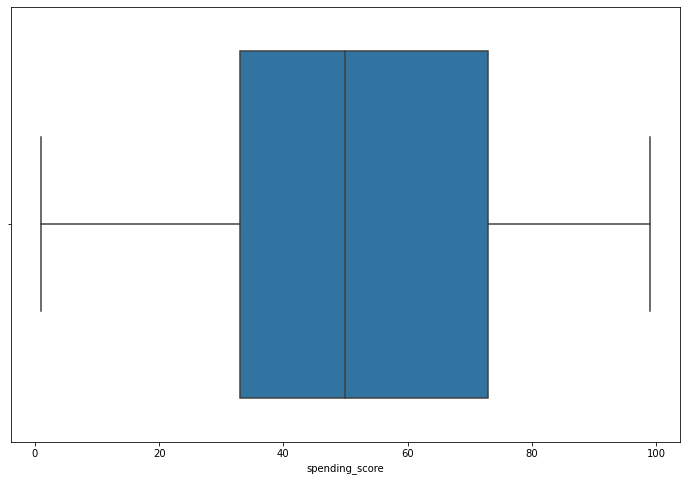

In [35]:
plt.figure(figsize=(12, 8))

sns.boxplot(mall_updated['spending_score'], orient='v')

/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='annual_income'>

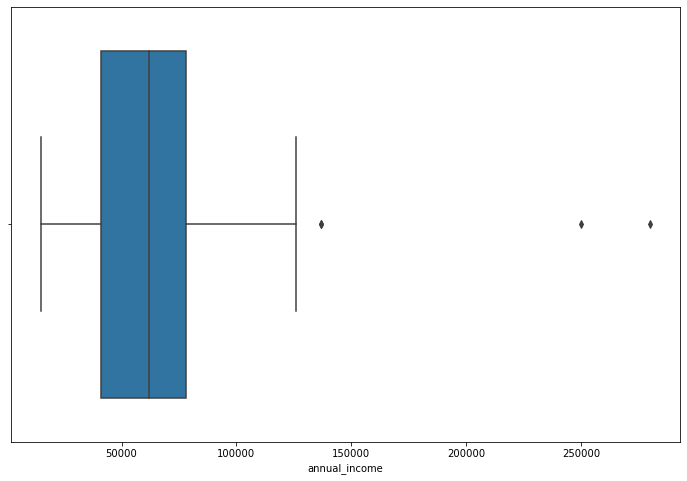

In [36]:
plt.figure(figsize=(12, 8))

sns.boxplot(mall_updated['annual_income'], orient='v')